## Q-Learning

In this TD learning assignment, we are going to look at Q-learning, an off-policy TD learning method.
The environment investigated here is the famous Taxi-v3 environment from OpenAI Gym.


In [ ]:
###import the required modules

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(0)

## Cliff walking problem

- The cliff is a gridworld-type, undiscounted, episodic task, with start state `S` and goal state `G`. 
- There are four actions allowed: up, down, right, and left. 
- Action selection is $\epsilon$-greedy; i.e., occasionally the agent will move in a random direction.
- Reward is -1 on all transitions except those into the region marked 'The Cliff'. 
- Stepping into this region incurs a reward of -100 and sends the agent instantly back to `S`.

Ideally, we would want to train an RL agent that learns the optimal policy and avoids traveling right along the cliff edge. In this and the next assignment, we compare how Q-Learning and SARSA fare with this task.

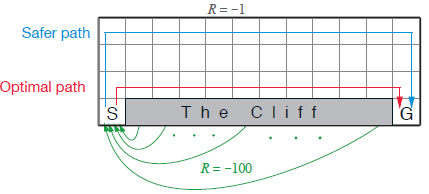

In [ ]:
# grid world related constants
GRID_HEIGHT = 4
GRID_WIDTH = 12

EPSILON = 0.1  # probability for exploration
ALPHA = 0.5    # step size
GAMMA = 1      # gamma for Q-Learning and SARSA

UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3
ACTIONS = [UP, DOWN, LEFT, RIGHT] # all possible actions

# initial state action pair values
START = [3, 0]
GOAL = [3, 11]

In [ ]:
# required helper methods
def step(state, action):
    i, j = state
    if action == UP:
        next_state = [max(i - 1, 0), j]
    elif action == LEFT:
        next_state = [i, max(j - 1, 0)]
    elif action == RIGHT:
        next_state = [i, min(j + 1, GRID_WIDTH - 1)]
    elif action == DOWN:
        next_state = [min(i + 1, GRID_HEIGHT - 1), j]
    else:
        assert False

    reward = -1
    if (action == DOWN and i == 2 and 1 <= j <= 10) or (
        action == RIGHT and state == START):
        reward = -100
        next_state = START

    return next_state, reward

def epsilon_greedy(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

Now we create a function that performs Q-Learning. It will do the following: 

- Update Q-values until episode convergence
- Return total rewards within this episode

In [ ]:
def q_learning(q_value):
    state = START
    rewards = 0.0
    while state != GOAL:
        action = epsilon_greedy(state, q_value)
        next_state, reward = step(state, action)
        rewards += reward
        
        # define target for Q-Learning
        target = None
        # your code here
        
        
        # Q-Learning update
        q_value[state[0], state[1], action] += ALPHA * (target - q_value[state[0], state[1], action])
        state = next_state
    return rewards

In [ ]:
episodes = 100 # episodes of each run
rewards_q = np.zeros(episodes)
q_values = np.zeros((GRID_HEIGHT, GRID_WIDTH, 4))

for i in range(episodes):
    rewards_q[i] += q_learning(q_values)

In [ ]:
assert (sum((rewards_q >= np.mean(rewards_q)))) > 70

In [ ]:
# episodes of each run
episodes = 500

rewards_q_learning = np.zeros(episodes)

# we take multiple runs to create a smooth curve
# however the optimal policy converges well with a single run
for _ in tqdm(range(20)):
    q_q_learning = np.zeros((GRID_HEIGHT, GRID_WIDTH, 4))
    for i in range(episodes):
        rewards_q_learning[i] += q_learning(q_q_learning)

# averaging over independent runs
rewards_q_learning /= 20

# draw reward curves
plt.plot(rewards_q_learning, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards during episode')
plt.ylim([-100, 0])
plt.legend()
plt.show()

In [ ]:
assert (abs(np.mean(rewards_q_learning[-100:]))) < 50

Here we can see that Q-Learning converges to the optimal path.